In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.listdir("C:\\Users\\work\\data-prep\\pandas\\input"))

['athlete_events.csv', 'noc_regions.csv']


In [67]:
data = pd.read_csv('C:\\Users\\work\\data-prep\\pandas\\input\\athlete_events.csv')
data.shape
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))
data.isnull().sum()

Are there missing values? True


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [23]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [24]:
data.iloc[:, 1:].describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [25]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [29]:
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [31]:
np.sort(data.Year.unique())

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [32]:
data.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [36]:
data_gender = data['Sex'].value_counts()
data_gender.head()

M    196594
F     74522
Name: Sex, dtype: int64

In [39]:
avg_height = data.Height.mean()
avg_height

175.33896987366376

In [41]:
data["Height_Level"] = ["Short" if avg_height > item else "Tall" for item in data.Height]
pd.pivot_table(data, index="Height_Level", values="Height")

,Height
Height_Level,
Short,167.164170
Tall,183.983478


In [48]:
avg_Age = data.Age.mean()
print("Avg age:", avg_Age)
data["Age_Level"] = ["Old" if item>avg_Age else "Young" for item in data.Age]
data.loc[:10, ["Age_Level", "Age", "Name"]]

Avg age: 25.556898357297374


,Age_Level,Age,Name
0,Young,24.0,A Dijiang
1,Young,23.0,A Lamusi
2,Young,24.0,Gunnar Nielsen Aaby
3,Old,34.0,Edgar Lindenau Aabye
4,Young,21.0,Christine Jacoba Aaftink
5,Young,21.0,Christine Jacoba Aaftink
6,Young,25.0,Christine Jacoba Aaftink
7,Young,25.0,Christine Jacoba Aaftink
8,Old,27.0,Christine Jacoba Aaftink
9,Old,27.0,Christine Jacoba Aaftink


In [51]:
data_gold = data[np.logical_and(data["Age"]<18, data['Medal'] == 'Gold')]
data_gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_Level,Age_Level
710,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold,Tall,Young
2005,1109,Lavinia Agache (-Carney),F,16.0,148.0,40.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold,Short,Young
4835,2762,Margarita Sergeyevna Aliychuk,F,17.0,174.0,48.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Short,Young
5147,2929,Lynne Marie Allsup (-Olson),F,15.0,163.0,59.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,Short,Young
5826,3281,Simona Amnar (-Tabr),F,16.0,158.0,44.0,Romania,ROU,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Horse Vault,Gold,Short,Young


In [52]:
def find(year,sport,Medal="Gold"):
    """
    parameter: Year,Sport type
    return: Athletes who receive a gold medal according to the sport type and the year.
    """
    data_find=data[(data['Year']==year) & (data['Sport']==sport) & (data['Medal']==Medal)]
    return data_find
find(2000,"Wrestling")


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_Level,Age_Level
591,339,Namiq Yadulla Abdullayev,M,29.0,167.0,55.0,Azerbaijan,AZE,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Gold,Short,Old
11573,6305,Filiberto Azcuy Aguilera,M,27.0,177.0,74.0,Cuba,CUB,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",Gold,Tall,Old
48037,24758,Ali Reza Dabir,M,22.0,172.0,66.0,Iran,IRI,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold,Short,Young
76414,38775,Rulon E. Gardner,M,29.0,187.0,120.0,United States,USA,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",Gold,Tall,Old
102104,51655,Baraladei Daniel Igali,M,26.0,168.0,74.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Freestyle",Gold,Short,Old
113566,57519,Murat Nausbiyevich Kardanov,M,29.0,178.0,76.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Gold,Tall,Old
141017,70782,Bo Urban Mikael Ljungberg,M,30.0,189.0,97.0,Sweden,SWE,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",Gold,Tall,Old
166468,83614,Sagid Magomedovich Murtazaliyev,M,26.0,185.0,97.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Heavyweight, Freestyle",Gold,Tall,Old
166700,83733,David Vladimirovi Musubes,M,28.0,186.0,113.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold,Tall,Old
168838,84861,Armen Lyudvikovich Nazaryan,M,26.0,162.0,60.0,Bulgaria,BUL,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",Gold,Short,Old


In [60]:
data.Sport.unique()

data.Year.unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [62]:
find(2000,"Wrestling")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_Level,Age_Level
591,339,Namiq Yadulla Abdullayev,M,29.0,167.0,55.0,Azerbaijan,AZE,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Gold,Short,Old
11573,6305,Filiberto Azcuy Aguilera,M,27.0,177.0,74.0,Cuba,CUB,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",Gold,Tall,Old
48037,24758,Ali Reza Dabir,M,22.0,172.0,66.0,Iran,IRI,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold,Short,Young
76414,38775,Rulon E. Gardner,M,29.0,187.0,120.0,United States,USA,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",Gold,Tall,Old
102104,51655,Baraladei Daniel Igali,M,26.0,168.0,74.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Freestyle",Gold,Short,Old
113566,57519,Murat Nausbiyevich Kardanov,M,29.0,178.0,76.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Gold,Tall,Old
141017,70782,Bo Urban Mikael Ljungberg,M,30.0,189.0,97.0,Sweden,SWE,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",Gold,Tall,Old
166468,83614,Sagid Magomedovich Murtazaliyev,M,26.0,185.0,97.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Heavyweight, Freestyle",Gold,Tall,Old
166700,83733,David Vladimirovi Musubes,M,28.0,186.0,113.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold,Tall,Old
168838,84861,Armen Lyudvikovich Nazaryan,M,26.0,162.0,60.0,Bulgaria,BUL,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",Gold,Short,Old


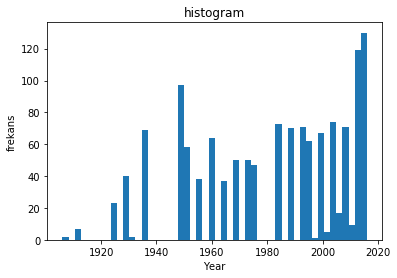

In [64]:
data_turkey=data[data.Team=="Turkey"]
f = plt.figure()
plt.hist(data_turkey.Year,bins=50)
plt.xlabel("Year")
plt.ylabel("frekans")
plt.title("histogram")
plt.show()
f.savefig("test.pdf", bbox_inches='tight')

In [69]:
athlete = pd.read_csv('C:\\Users\\kanyad\\work\\data-prep\\pandas\\input\\athlete_events.csv')
noc = pd.read_csv('C:\\Users\\kanyad\\work\\data-prep\\pandas\\input\\noc_regions.csv')

In [75]:
athlete['Age'].isnull().values.ravel().sum()

9474

In [76]:
for x in athlete.columns:
    if athlete[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,athlete[x].isnull().values.ravel().sum()))

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333


In [78]:
for x in noc.columns:
    if noc[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x, noc[x].isnull().values.ravel().sum()))

region - 3
notes - 209


In [81]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [82]:
athlete.Games.head()

0    1992 Summer
1    2012 Summer
2    1920 Summer
3    1900 Summer
4    1988 Winter
Name: Games, dtype: object

In [97]:
games_athletes = athlete.pivot_table(athlete, index="Games", aggfunc=len).resetindex()[['Games', 'Sport']]

AttributeError: 'DataFrame' object has no attribute 'resetindex'